In [2]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#determine time frame of dataset
sets = pd.read_csv('sets.csv')

max_year = sets['year'].max()
min_year = sets['year'].min()

print(max_year, min_year)

2017 1950


In [4]:
#import colors.csv
colors = pd.read_csv('colors.csv')
print(colors)

       id                          name     rgb is_trans
0      -1                       Unknown  0033B2        f
1       0                         Black  05131D        f
2       1                          Blue  0055BF        f
3       2                         Green  237841        f
4       3                Dark Turquoise  008F9B        f
..    ...                           ...     ...      ...
130  1004  Trans Flame Yellowish Orange  FCB76D        t
131  1005             Trans Fire Yellow  FBE890        t
132  1006        Trans Light Royal Blue  B4D4F7        t
133  1007                 Reddish Lilac  8E5597        f
134  9999                    [No Color]  05131D        f

[135 rows x 4 columns]


In [5]:
#determine how many columns in colors are null
nan_count_colors = colors.isna().sum()
print(nan_count_colors)

id          0
name        0
rgb         0
is_trans    0
dtype: int64


In [6]:
#use value_counts to determine how many unique LEGO colors exist; subset to only include HEX code and name for readability
colors.value_counts(subset=['name','rgb'])

name                      rgb   
Aqua                      B3D7D1    1
Pearl White               F2F3F2    1
Speckle Black-Copper      000000    1
Sky Blue                  7DBFDD    1
Sand Red                  D67572    1
                                   ..
Glitter Trans-Light Blue  68BCC5    1
Glitter Trans-Dark Pink   DF6695    1
Glitter Trans-Clear       FFFFFF    1
Flesh                     D09168    1
[No Color]                05131D    1
Length: 135, dtype: int64

In [7]:
#determine how many translucent colors there are
colors.value_counts(subset=['is_trans'])

is_trans
f           107
t            28
dtype: int64

In [8]:
#replace 'Unknown' based on hex code in column 'rgb' color name using df.loc[]
colors.loc[colors['name'] == 'Unknown','name'] = 'Very Dark Blue'

#replace '[No Color]' based on hex code in column 'rgb' color name using df.loc[]
colors.loc[colors['name'] == '[No Color]', 'name'] = 'Mainly Blue'

#print result to check changes
print(colors)

       id                          name     rgb is_trans
0      -1                Very Dark Blue  0033B2        f
1       0                         Black  05131D        f
2       1                          Blue  0055BF        f
3       2                         Green  237841        f
4       3                Dark Turquoise  008F9B        f
..    ...                           ...     ...      ...
130  1004  Trans Flame Yellowish Orange  FCB76D        t
131  1005             Trans Fire Yellow  FBE890        t
132  1006        Trans Light Royal Blue  B4D4F7        t
133  1007                 Reddish Lilac  8E5597        f
134  9999                   Mainly Blue  05131D        f

[135 rows x 4 columns]


In [9]:
#import inventory_parts file
inventory_parts = pd.read_csv('inventory_parts.csv')

#join colors and inventory_parts as colors_inventory
colors_inventory = colors.merge(inventory_parts, how='left', left_on='id',right_on='color_id')

#print to see merged table
print(colors_inventory)

          id            name     rgb is_trans  inventory_id      part_num  \
0         -1  Very Dark Blue  0033B2        f          80.0     belvfair6   
1         -1  Very Dark Blue  0033B2        f          80.0     belvfem26   
2         -1  Very Dark Blue  0033B2        f          80.0    belvmale13   
3         -1  Very Dark Blue  0033B2        f         214.0         fab6e   
4         -1  Very Dark Blue  0033B2        f         250.0     belvfair4   
...      ...             ...     ...      ...           ...           ...   
580250  9999     Mainly Blue  05131D        f       17826.0         30890   
580251  9999     Mainly Blue  05131D        f       18221.0     8880stk01   
580252  9999     Mainly Blue  05131D        f       18322.0  75171stkpr01   
580253  9999     Mainly Blue  05131D        f       18704.0         34100   
580254  9999     Mainly Blue  05131D        f       18708.0         20243   

        color_id  quantity is_spare  
0           -1.0       1.0        f  

In [10]:
#group the types of parts by their color and count the number of types of parts with that color; sort values based on number of types of parts with that color
colors_inventory_justcolors = colors_inventory.groupby(['name'])['name'].count().sort_values(ascending=False)
print(colors_inventory_justcolors)

#note: the quantity column represents number of parts of that piece in the set and this analysis just looks at the count of colors represented the type of part

name
Black                           115176
White                            66549
Light Bluish Gray                55317
Red                              50217
Dark Bluish Gray                 43913
                                 ...  
Trans-Black IR Lens                  1
Trans Light Royal Blue               1
Trans Flame Yellowish Orange         1
Trans Fire Yellow                    1
Reddish Lilac                        1
Name: name, Length: 135, dtype: int64


In [11]:
#note: several colors only appear in one type of brick (e.g., 'Trans-Black IR Lens') while several colors correspond to a lot of bricks (e.g., 'Black')
    #i.e., determining a set based on a rare color makes more sense than using a common color

In [12]:
#import inventories and sets files
inventories = pd.read_csv('inventories.csv')
sets = pd.read_csv('sets.csv')

#join inventory with inventories on inventory_id = id using an inner join to return matching records
colors_inventory_inventories = pd.merge(colors_inventory, inventories, how='inner', left_on='inventory_id',right_on='id', suffixes=('_colors','_inventories'))

#drop irrelevant columns
#inventory id and id_inventories: no longer needed;
#part_num: focus on colors, not the types of parts; 
#is_spare: focus on included pieces, irrelevant if it's spare or not;
#version: all versions are the same (1), doesn't add information
#color_id: color_id_colors = color_id
colors_inventory_inventories.drop(['inventory_id','part_num','is_spare','version','color_id','id_inventories'], axis=1, inplace=True)

#colors_inventory_inventories shows what colors appear in what sets
print(colors_inventory_inventories)

        id_colors            name     rgb is_trans  quantity       set_num
0              -1  Very Dark Blue  0033B2        f       1.0        5827-1
1              -1  Very Dark Blue  0033B2        f       1.0        5827-1
2              -1  Very Dark Blue  0033B2        f       1.0        5827-1
3               1            Blue  0055BF        f       2.0        5827-1
4               1            Blue  0055BF        f       2.0        5827-1
...           ...             ...     ...      ...       ...           ...
580246       9999     Mainly Blue  05131D        f       1.0        9874-1
580247       9999     Mainly Blue  05131D        f       1.0        6861-2
580248       9999     Mainly Blue  05131D        f       1.0  DKLEGOBOOK-2
580249       9999     Mainly Blue  05131D        f       1.0        8891-1
580250       9999     Mainly Blue  05131D        f       1.0         890-2

[580251 rows x 6 columns]


In [13]:
#determine how many colors in each set
color_in_sets = colors_inventory_inventories.groupby(['set_num'])['quantity'].count().sort_values(ascending=False).reset_index(name='count')

#what are the mean, min/max, stdev of colors per set
color_in_sets.describe().astype(int)

,count
count,10713
mean,54
std,68
min,1
25%,9
50%,27
75%,73
max,769


In [94]:
#create color_sets to store the number of times colors appear in sets 
color_sets = colors_inventory_inventories.groupby(['id_colors','rgb','name'])['quantity'].count().sort_values(ascending=False).reset_index(name='count')
print(color_sets)

     id_colors     rgb                    name   count
0            0  05131D                   Black  115176
1           15  FFFFFF                   White   66549
2           71  A0A5A9       Light Bluish Gray   55317
3            4  C91A09                     Red   50217
4           72  6C6E68        Dark Bluish Gray   43913
..         ...     ...                     ...     ...
126         68  F3CF9B       Very Light Orange       2
127        503  E6E3DA         Very Light Gray       2
128       1001  9391E4           Medium Violet       2
129         62  3CB371            Chrome Green       2
130       1006  B4D4F7  Trans Light Royal Blue       1

[131 rows x 4 columns]


In [15]:
#descriptive statistics for colors_sets to determine cutoff for most common and least common colors
color_sets['count'].describe().astype(int)

count       131
mean       4429
std       14307
min           1
25%          24
50%         255
75%        1971
max      115176
Name: count, dtype: int64

[Text(0.5, 0, 'Name of Color'),
 Text(0, 0.5, 'Number of Times Color Appears in LEGO Sets')]

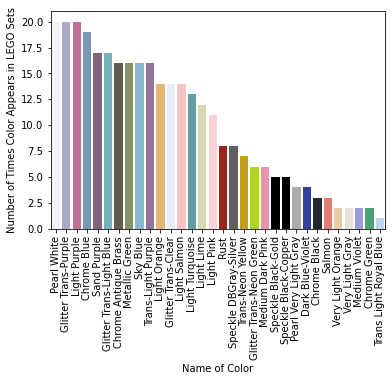

In [99]:
#assume rare colors are colors lower than the 25th percentile
#use len() function to count rows with single condition (color_sets['count'] < 24) since 24 is the 25th percentile
color_sets_rare = len(color_sets[color_sets['count'] < 24])

#determine least common colors/rare colors
rare_colors = color_sets.tail(color_sets_rare)

#rename 'name' to 'rare_name'
rare_colors = rare_colors.rename(columns = {'name':'rare_name'}).reset_index(drop=True)

#create a list of hex codes of the rare color from rare_colors
color_list = list(rare_colors['rgb'])

#add a hashtag to each list item in color_list
color_list_updated = ["#" + color for color in color_list]

#change Glitter Trans Clear hex code to be a visible color; hex code color for glitter is #E6E8FA
for i in range(len(color_list_updated)):
    if color_list_updated[i] == '#FFFFFF':
         color_list_updated[i] = '#E6E8FA'

#set color palette for sns 
sns.set_palette(sns.color_palette(color_list_updated))

ax = sns.barplot(data=rare_colors, x='rare_name', y='count') #y is the number of times that a color appears in any set
plt.xticks(rotation=90)
ax.set(xlabel='Name of Color', ylabel='Number of Times Color Appears in LEGO Sets')

In [19]:
#determine the sets that the rare colors appear in 
#reset the index, drop=True
rare_sets = colors_inventory_inventories[colors_inventory_inventories['name'].isin(rare_colors['rare_name'])].reset_index(drop=True)

#drop the irrelevant columns
rare_sets = rare_sets.drop(['id_colors','is_trans','quantity'], axis=1)

#this gives a dataframe with the color name, the hex code and the set number the colors appear in
print(rare_sets)

                     name     rgb  set_num
0              Light Pink  FECCCF   5895-1
1         Light Turquoise  55A5AF   5838-1
2         Light Turquoise  55A5AF   5850-1
3             Chrome Blue  6C96BF   5850-1
4              Light Pink  FECCCF   5850-1
..                    ...     ...      ...
318              Sky Blue  7DBFDD   7530-1
319    Trans-Light Purple  96709F  7574-20
320  Chrome Antique Brass  645A4C  HPG03-1
321    Trans-Light Purple  96709F   7574-5
322    Trans-Light Purple  96709F   7574-5

[323 rows x 3 columns]


In [20]:
#import sets and themes
sets = pd.read_csv('sets.csv')
themes = pd.read_csv('themes.csv')

#join sets and themes
set_themes = sets.merge(right=themes, how='inner', left_on='theme_id', right_on='id', suffixes=('_set','_theme'))
print(set_themes)

        set_num                                           name_set  year  \
0          00-1                                    Weetabix Castle  1970   
1        0011-2                                  Town Mini-Figures  1978   
2        2181-1                                         Infomaniac  1997   
3         300-1                             T-Junction Road Plates  1978   
4         301-1                                 Curved Road Plates  1978   
...         ...                                                ...   ...   
11668   K6762-1                                        Western Kit  2002   
11669   K7623-1        Indiana Jones Classic Adventures Collection  2008   
11670  llca27-1  Legoland Pirate with Parrot (Legoland California)  2006   
11671  LLCA29-1  Pirate Treasure Chest Bank (LLCA Ambassador Pa...  2006   
11672  LLCA30-1  Pirate Ship Diorama (LLCA Ambassador Pass Excl...  2006   

       theme_id  num_parts   id     name_theme  parent_id  
0           414        471 

In [21]:
#determine how many sets per theme
num_themes = set_themes['name_theme'].value_counts()
print(num_themes)

Supplemental           496
Technic                435
City                   287
Friends                269
Basic Set              257
                      ... 
Ghostbusters             1
Planet Series 3          1
Star Wars Episode 8      1
Imperial Guards          1
Indiana Jones            1
Name: name_theme, Length: 386, dtype: int64


In [22]:
#descriptive statistics of the number of sets
num_themes.describe().astype(int)

count    386
mean      30
std       53
min        1
25%        6
50%       14
75%       27
max      496
Name: name_theme, dtype: int64

In [100]:
#colors associated with each theme

#join colors_inventory_inventories with set_themes
color_themes = colors_inventory_inventories.merge(right=set_themes, left_on='set_num', right_on='set_num', how='inner')

In [25]:
#how many colors in each theme
color_themes.groupby(['name_theme'])['name'].count().sort_values(ascending=False)

name_theme
Basic Set                  20233
Star Wars Episode 4/5/6    17357
Ninjago                    16876
Friends                    16603
Creator                    14704
                           ...  
Jumbo Bricks                  11
4 Juniors                     10
Classic Town                   9
Control Lab                    2
HO 1:87 Vehicles               1
Name: name, Length: 379, dtype: int64

In [28]:
#color makeup of each theme
color_themes.groupby(['name_theme','name'])['name'].count()


name_theme  name      
12V         Black         576
            Blue          127
            Brown           4
            Dark Gray      25
            Green           1
                         ... 
eLAB        Green           4
            Light Gray     27
            Red             8
            White           4
            Yellow          9
Name: name, Length: 10443, dtype: int64

In [29]:
#top ten themes based on number of sets (minus Supplemental, Basic Set, Service Packs, and Gear)
print(num_themes.head(14))


Supplemental     496
Technic          435
City             287
Friends          269
Basic Set        257
Creator          249
Gear             246
Service Packs    242
Duplo            219
Star Wars        211
Construction     194
Ninjago          191
Police           174
Airport          172
Name: name_theme, dtype: int64


In [30]:
#determine color make up from top ten sets

#create top themes variables from color_themes['name_theme']
technic = color_themes['name_theme'] == 'Technic'
city = color_themes['name_theme'] == 'City'
friends = color_themes['name_theme'] == 'Friends'
creator = color_themes['name_theme'] == 'Creator'
duplo = color_themes['name_theme'] == 'Duplo'
star_wars = color_themes['name_theme'] == 'Star Wars'
construction = color_themes['name_theme'] == 'Construction'
ninjago = color_themes['name_theme'] == 'Ninjago'
police = color_themes['name_theme'] == 'Police'
airport = color_themes['name_theme'] == 'Airport'

#pass top_themes into color_themes to create a dataframe of only these themes
color_top_themes = color_themes[technic | city | friends | creator | duplo | star_wars | construction | ninjago | police | airport]

#group color_top_themes by name_theme and name
color_top_themes.groupby(['name_theme','name'])['name'].count()

name_theme  name               
Airport     Black                  2192
            Blue                    776
            Bright Green              1
            Bright Light Orange       1
            Bright Pink               2
                                   ... 
Technic     Trans-Orange             39
            Trans-Red                66
            Trans-Yellow              8
            White                   409
            Yellow                  533
Name: name, Length: 568, dtype: int64

    name_theme           rare_name  count_rare_colors_in_theme
0     Aquazone         Chrome Blue                           1
1     Atlantis  Speckle Black-Gold                           5
2        Basic    Medium Dark Pink                           6
3    Basic Set        Light Purple                          13
4    Basic Set     Very Light Gray                           1
..         ...                 ...                         ...
99      Titans   Trans-Neon Yellow                           1
100        Toa   Trans-Neon Yellow                           2
101   Toa Nuva   Trans-Neon Yellow                           1
102     Turaga   Trans-Neon Yellow                           2
103      Xalax         Sand Purple                           2

[104 rows x 3 columns]


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'Chrome Blue'),
  Text(1, 0, 'Speckle Black-Gold'),
  Text(2, 0, 'Medium Dark Pink'),
  Text(3, 0, 'Light Purple'),
  Text(4, 0, 'Very Light Gray'),
  Text(5, 0, 'Light Pink'),
  Text(6, 0, 'Metallic Green'),
  Text(7, 0, 'Pearl Very Light Gray'),
  Text(8, 0, 'Chrome Antique Brass'),
  Text(9, 0, 'Glitter Trans-Purple'),
  Text(10, 0, 'Light Orange'),
  Text(11, 0, 'Light Salmon'),
  Text(12, 0, 'Light Turquoise'),
  Text(13, 0, 'Pearl White'),
  Text(14, 0, 'Sky Blue'),
  Text(15, 0, 'Trans Light Royal Blue'),
  Text(16, 0, 'Trans-Light Purple'),
  Text(17, 0, 'Very Light Orange'),
  Text(18, 0, 'Glitter Trans-Clear'),
  Text(19, 0, 'Glitter Trans-Light Blue'),
  Text(20, 0, 'Glitter Trans-Neon Green'),
  Text(21, 0, 'Light Lime'),
  Text(22, 0, 'Dark Blue-Violet'),
  Text(23, 0, 'Medium Violet'),
  Text(24, 0, 'Speckle Black-C

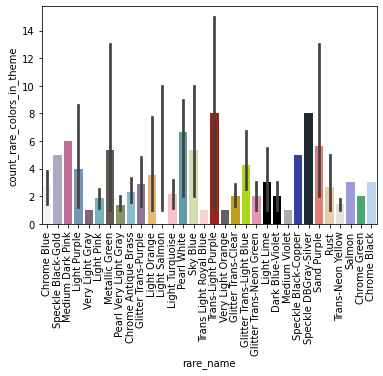

In [103]:
#determine what rare colors appear in color_top_themes and color_themes
rare_colors_in_themes = color_themes.merge(rare_colors, how='inner', left_on='name', right_on='rare_name').groupby(['name_theme','rare_name'])['rare_name'].count().reset_index(name='count_rare_colors_in_theme')
print(rare_colors_in_themes)

#create a list of hex codes of the rare color from rare_colors
color_list = list(rare_colors['rgb'])

#add a hashtag to each list item in color_list
color_list_updated = ["#" + color for color in color_list]

#set color palette for sns 
sns.set_palette(sns.color_palette(color_list_updated))

#plot the number of themes the rare colors appear in using sns.barplot
sns.barplot(data=rare_colors_in_themes, x='rare_name', y='count_rare_colors_in_theme')
plt.xticks(rotation=90)


In [ ]:
#rare_colors_in_top_themes

